In [1]:
import numpy as np
import seaborn as sns

In [2]:
def front_door_simulator(n=5000):
    # Simulation
    u = np.random.normal(size=(n, 1))
    x = np.random.normal(np.sin(u), 0.1)
    z = np.random.normal(1+(-x)**2, 0.1)
    y = np.random.normal(np.sin(u**2) + 5/(z), 0.1)

    # Getting them together:
    data = np.hstack((x, z, y, u))

    return data

In [3]:
data = front_door_simulator(100000)

In [6]:
# sum_z p(z|x) sum_x' p(y| z, x') p(x')
def p_y_do_x(x, data, n_samples=100):
    """
    This function approximates the front-door estimation of the effect of do(X=x) on y
    Since the effects are non-linear, the conditional distributions must be estimated.
    These will be approximated from the data
    Inputs:
    x (float): the value of the intervened x
    data (ndarray): the data to be estimated from
    n_samples: The number of samples to be used for the monte carlo integration
    """
    data = data.round(2)
    x = x.round(2)
    
    # p(z|x)
    #mask                 = (data[:,0]==x)
    #z_given_x            = data[mask, 1]
    #z_interval, z_counts = np.unique(z_given_x, return_counts=True)
    #prob_z_given_x       = z_counts/np.sum(z_counts)
    #z                    = np.random.choice(z_interval, p=prob_z_given_x, size=100)
    z = np.random.normal(1+(-x)**2, 0.1, size=100)
    
    # p(x)
    x_marginal           = data[:,0]
    x_interval, x_counts = np.unique(x_marginal, return_counts=True)
    prob_x               = x_counts/np.sum(x_counts)
    x_marginal           = np.random.choice(x_interval, p=prob_x, size=n_samples)
    
    # p(u|x)
    u = np.zeros_like(x_marginal)
    for x_i in range(len(x_marginal)):
        # Memoization mechanism so we don't have to repeat computation
        x_key = x_marginal[x_i]

        mem = {}
        if x_key in mem:
            u_interval, u_counts = mem[x_key]
            prob_u_given_x = u_counts/np.sum(u_counts)
        else:
            mask = (data[:,0]==x_key)
            u_given_x = data[mask, 3]
            mem[x_key] = np.unique(u_given_x, return_counts=True)
            u_interval, u_counts = mem[x_key]
            prob_u_given_x = u_counts/np.sum(u_counts)

        # Fill in the sample
        u[x_i] = np.random.choice(u_interval, p=prob_u_given_x)
        
    # p(y | z, x)
    z_u = np.array(np.meshgrid(z, u)).T.reshape(-1,2)
    y   = np.random.normal(np.sin(z_u[:,1]**2) + 5/(z_u[:,0]), 0.1)
            
    return y

In [7]:
test_1 = p_y_do_x(1.00, data, n_samples=500)
test_2 = p_y_do_x(1.00, data, n_samples=500)
test_3 = p_y_do_x(1.00, data, n_samples=500)
test_4 = p_y_do_x(1.00, data, n_samples=500)
test_5 = p_y_do_x(1.00, data, n_samples=500)

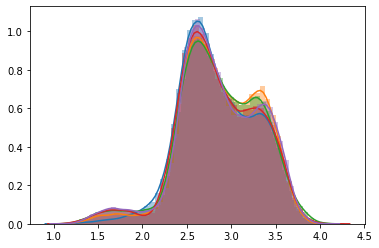

In [8]:
ax = sns.distplot(test_1)
ax = sns.distplot(test_2)
ax = sns.distplot(test_3)
ax = sns.distplot(test_4)
ax = sns.distplot(test_5)

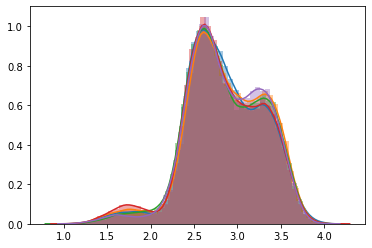

In [445]:
ax = sns.distplot(test_1)
ax = sns.distplot(test_2)
ax = sns.distplot(test_3)
ax = sns.distplot(test_4)
ax = sns.distplot(test_5)

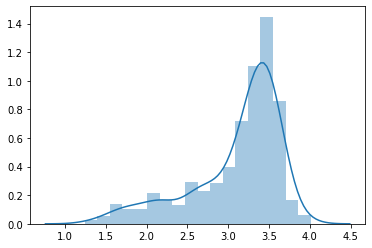

In [443]:
ax = sns.distplot(data[data[:,0]==1.00, 2])

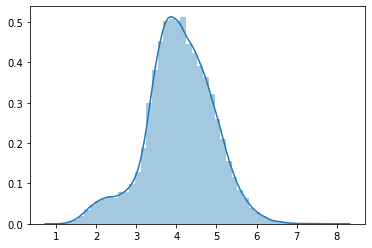

In [442]:
ax = sns.distplot(data[:, 2])

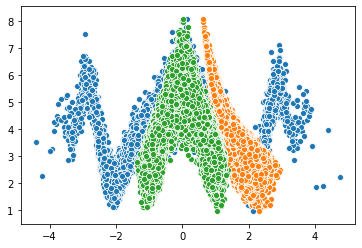

In [293]:
ax = sns.scatterplot(x=data[:,3], y=data[:,2])
ax = sns.scatterplot(x=data[:,1], y=data[:,2])
ax = sns.scatterplot(x=data[:,0], y=data[:,2])